In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image

In [3]:
#dimendsions of image

img_width,img_height=150 ,150



In [4]:
train_data_dir='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gender_dataset_face/train' 
#path for training data
validation_data_dir='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gender_dataset_face/validate' 
# path for test data
nb_train_samples =2237   #1000
nb_validation_samples=862   #500
epochs =20 #no of times batch is sent to the neural network:50
batch_size=20  #size of each batch:20

In [1]:
if K.image_data_format()=='channels_first':
    input_shape= (3,img_widtrh, img_height) #RGB image has 3 channels, to ensure image given is in correct format
else:
    input_shape=(img_width,img_height,3)  # 150 150 3



NameError: name 'K' is not defined

In [6]:

# generating the training data: rescale,shear,zoom,flip
train_datagen= ImageDataGenerator(
    rescale = 1./ 255,
    shear_range=0.2,
    zoom_range=-0.2,
    horizontal_flip=True)


In [7]:
#augmentation configuration used for testing
#rescaling

test_datagen= ImageDataGenerator(rescale=1./255) # testing data, only rescaled


In [8]:

#get the training data from the path
train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size= batch_size,
    class_mode='binary')



Found 2237 images belonging to 2 classes.


In [9]:

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 862 images belonging to 2 classes.


In [18]:

####model of neural network
model =Sequential()
model.add(Conv2D(32, (3,3),input_shape=input_shape)) # adding a conv network the neur al network, 32 features from 3 3 matrix in the input shape
model.add(Activation('relu')) #activation fucntio; data is either 0 or 1.
model.add(MaxPooling2D(pool_size=(2,2))) #reduce the size without losing the data, normalise the features  





In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # from 2D to 1D
model.add(Dense(64)) #adding a layer of 64 nodes/inputs
model.add(Activation('relu')) 
model.add(Dropout(0.5)) # so that it doesnt overfit
model.add(Dense(1)) #adding a layer to the output , connecting all the output layers to a layer
model.add(Activation('sigmoid')) # data comes as it is.



In [21]:
model.summary()# give the summary of the entire data


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [22]:


#compiling all the layers 
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])



In [23]:

#augmentation configuration used for training 
#neural network strats
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size )


Epoch 1/20
111/111 [==============================] - 189s 2s/step - loss: 0.6648 - acc: 0.6353 - val_loss: 0.4776 - val_acc: 0.7874
Epoch 2/20
111/111 [==============================] - 200s 2s/step - loss: 0.4362 - acc: 0.8112 - val_loss: 0.2174 - val_acc: 0.9074
Epoch 3/20
111/111 [==============================] - 192s 2s/step - loss: 0.3553 - acc: 0.8532 - val_loss: 0.2384 - val_acc: 0.9000
Epoch 4/20
111/111 [==============================] - 189s 2s/step - loss: 0.3231 - acc: 0.8742 - val_loss: 0.1769 - val_acc: 0.9311
Epoch 5/20
111/111 [==============================] - 187s 2s/step - loss: 0.2839 - acc: 0.8824 - val_loss: 0.1447 - val_acc: 0.9466
Epoch 6/20
111/111 [==============================] - 191s 2s/step - loss: 0.2650 - acc: 0.8881 - val_loss: 0.1689 - val_acc: 0.9347
Epoch 7/20
111/111 [==============================] - 192s 2s/step - loss: 0.2311 - acc: 0.9084 - val_loss: 0.1621 - val_acc: 0.9371
Epoch 8/20
111/111 [==============================] - 191s 2s/step - 

In [24]:
model.save_weights('Gender_EDI.h5') #saving the learnt data 
    

In [43]:
import json

# lets assume `model` is main model 
model_json = model.to_json()
with open("model_in_json.json", "w") as json_file:
    json.dump(model_json, json_file)

In [44]:
model.save_weights("model_weights.h5")

[[0.]]
woman


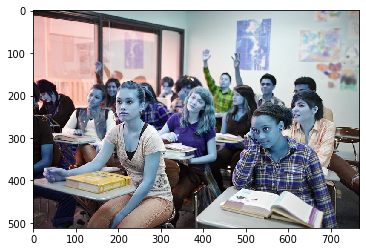

In [42]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2

#path= 'D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gad/girl3.jpg '
path='D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/studentsclassroom/studentsclassroomtrain/class7.jpg'
img = cv2.imread(path)
img_pred = image.load_img(path,target_size=(150,150)) 
#give an image to the neural network
img_pred =image.img_to_array(img_pred) #image conv to numpy array 
img_pred =np.expand_dims(img_pred, axis=0 )# array given to prediction model
#np.expand_dims(a, axis=1) 


In [ ]:
result=model.predict(img_pred)
print (result)
if result[0][0] ==1:
    prediction = "man"
else:
     prediction = "woman"

print(prediction)

plt.imshow(img)
plt.show()